<a href="https://colab.research.google.com/github/yrodriguezmd/Brightside-Datathon/blob/master/DFG_Brightside_Sept15_3pm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Brightside Housing Data Analysis, 2021

### Data-For-Good-YVR, 2021 September/ Rodriguez, M.

## ***Outline***

A.  Load and Clean Data

1.   2020 Brightside Data


*   Individual data
*   Grouped data


2.   Assets and Amenities Data

3.   Crime Data

4.   Merged Data  (2020 grouped data, Assets, Crime) 


B.  Data Representation

C.  Study Questions



1.   Perspective of Data with regards to Brightsdie Mandate
2.   Questions (Retrospective)

D.  Data Analyses

1.  Profile of Tenants

2.  Community Health

3.  Tenant Satisfaction

4.  Rooms for Improvement

    a.   What affects the perception of approachability?
    
    b.   Can we predict variable values?

    c.   Concrete things that can be addressed


E.  Summary and Recommendations







### **A. Load and Clean Data**

In [1]:
!git clone https://github.com/yrodriguezmd/DFGVancouver_Brightside2021.git

Cloning into 'DFGVancouver_Brightside2021'...
remote: Enumerating objects: 122, done.
remote: Counting objects: 100% (122/122), done.
remote: Compressing objects: 100% (118/118), done.
remote: Total 122 (delta 61), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (122/122), 921.26 KiB | 4.61 MiB/s, done.
Resolving deltas: 100% (61/61), done.


In [2]:
!ls

DFGVancouver_Brightside2021  sample_data


In [3]:
%cd DFGVancouver_Brightside2021

/content/DFGVancouver_Brightside2021


In [4]:
!ls

 crime.csv	   DFG_B_df10.csv	   rodriguez_2021_8_14_1140am.ipynb
 crime.ipynb	   means		  "surv'20_EDA_9_5_3pm.ipynb"
 data_2020.csv	   means_ass_crime.csv	  'surv'\''20_EDA_9_8_1pm (1).ipynb'
 data_2020.ipynb   means_ass_crime.ipynb   survey2020_9_4_6pm.ipynb
 datasets	   README.md		   survey2020_clean_9_5_1pm.ipynb


In [5]:
!ls datasets

2020			      2020_brightside_data_variable_codebook_0704.csv
2020_brightside_codebook.csv  Amenity_Rooms_and_Assets.csv
2020_brightside_data.csv


#### **A.1. 2020 Brightside Data**

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [52]:
df = pd.read_csv('/content/DFGVancouver_Brightside2021/datasets/2020_brightside_data.csv')
#df10.drop(columns = 'Unnamed: 0', axis=1, inplace=True)
df.head(3)

,RespondentID,newid,collectorid,location,date,nbr_relation,sense_commun,safe_violence,safe_covid,food_enough,food_access,food_variety,food_afford,food_worry,covid_info_satis,covid_brief_satis,maint_suite,maint_suite_txt,maint_common,maint_common_txt,maint_amenity,maint_amenity_txt,maint_exterior,maint_exterior_txt,maint_security,maint_security_txt,maint_landscape,maint_landscape_txt,maint_other,maint_other_txt,house_stable,house_stable_txt,apprch_bside,comm_email,comm_email_adj,comm_phone,comm_phone_adj,comm_note,comm_note_adj,comm_board,...,id_dis,id_substance,id_addict,id_mentalhealth,id_flee_viol,id_vet,id_lgbtq,id_racialized,id_recent_Imm,id_homeless,id_na,rln_status,rln_status_other,rln_support,rln_support_other,work_paid,work_vol,walk_aid,walk_aid_cane,walk_aid_walk,walk_aid_crutch,walk_aid_wlchair,walk_aid_scooter,walk_aid_na,walk_aid_other,walk_aid_other_txt,educ_level,educ_level_other,imm_status,imm_year,bside_dur,bside_pre,bside_pre_other,bside_pre_muni,bside_pre_muni_other,surv_feedback,surv_who,surv_who_other,surv_hear,surv_hear_other
0,1.100050e+11,5085857,270167554,LONDONDERRY,8/11/2020 19:02,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,3.0,Because of a tenant below me that has made my ...,2.0,4.0,0.0,1.0,1.0,3.0,0.0,3.0,...,,,,,,,,,,,,1.0,NaN,3.0,NaN,3.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,1.0,NaN,2.0,2.0,NaN,0.0,Burnaby,NaN,1.0,NaN,2.0,NaN
1,1.100050e+11,5135726,270167553,LIONS VIEW BLDG III,8/19/2020 13:37,2.0,2.0,2.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,I need new blinds it would be nice to upgrade ...,1.0,The front lobby carpet should be removed and p...,2.0,I've never been there :),1.0,The benches in the side of the building would ...,2.0,I think is pretty good,1.0,Just a bit of pruning at the front and side of...,2.0,I can't think of any now :),1.0,It is with in my means is about $ 10000 too mu...,1.0,1.0,1.0,1.0,1.0,5.0,0.0,4.0,...,,,,,,,,,,,,1.0,NaN,0.0,Friends and family,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,0.0,From Argentina 1973,3.0,0.0,Lived with my partner until the relationship e...,0.0,Pitt Meadows,I really would like that the building gets a b...,1.0,NaN,3.0,NaN
2,1.100050e+11,5213106,270167559,MOUNT PLEASANT,8/30/2020 20:26,NaN,2.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,3.0,2.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,...,,,,,,,,,,,,1.0,NaN,2.0,NaN,3.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,4.0,3.0,NaN,1.0,NaN,NaN,1.0,NaN,2.0,NaN


In [10]:
df.info()
# only 223 entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Columns: 237 entries, RespondentID to surv_hear_other
dtypes: float64(187), int64(2), object(48)
memory usage: 413.0+ KB


#### Identifying variables not answered by tenants

In [15]:
# variables with more than 10% null values
perc = ((df.isnull().sum()) / (len(df) )) *100
perc_null = perc [ perc > 10].to_frame()
print(len(perc_null.index.tolist()))
#perc_null_index = perc_null.index.tolist()
perc_null.index

172


Index(['safe_violence', 'maint_suite', 'maint_suite_txt', 'maint_common',
       'maint_common_txt', 'maint_amenity', 'maint_amenity_txt',
       'maint_exterior', 'maint_exterior_txt', 'maint_security',
       ...
       'walk_aid_na', 'walk_aid_other', 'walk_aid_other_txt',
       'educ_level_other', 'imm_year', 'bside_pre_other',
       'bside_pre_muni_other', 'surv_feedback', 'surv_who_other',
       'surv_hear_other'],
      dtype='object', length=172)

#### *Findings*:

The survey consisted of 237 variables.  Of the questions, 172 were not answered.

#### Remove non-contributory variables

In [38]:
df2 = df.drop(perc_null.index, axis=1)
df2.drop(['RespondentID', 'collectorid', 'newid', 'date', 'surv_who', 'surv_hear'], axis = 1, inplace=True)

In [39]:
# initial exploration at survey2020 showed blanks at id_***
df2.replace(r'^\s*$', np.nan, regex=True, inplace=True)
perc2 = ((df2.isnull().sum() / len(df2))*100).round(0)
null2 = perc2 [perc2 > 10]

df2.drop(null2.index, axis = 1, inplace=True)

#### Check relevance of values

In [40]:
df3 = df2.copy()
for key in df3.drop(['location','age'], axis=1).keys():
    print(key, ':', df3[key].unique())

nbr_relation : [ 2. nan  3.  1.  0.]
sense_commun : [ 2.  3.  1.  0. nan]
safe_covid : [ 2.  3.  0.  1. nan]
food_enough : [ 1. nan  2.  3.  0.  5.  4.]
food_access : [ 1. nan  2.  3.  4.  0.  5.]
food_variety : [ 1. nan  3.  2.  4.  0.  5.]
food_afford : [ 1. nan  4.  2.  3.  0.  5.]
food_worry : [ 1. nan  2.  3.  0.  4.  5.]
covid_info_satis : [ 2.  1.  3.  4. nan  5.]
covid_brief_satis : [ 2.  1.  3. nan  4.  5.]
house_stable : [ 3.  1. nan  2.  4.  5.]
apprch_bside : [ 2.  1.  3. nan  4.  5.]
comm_reg : [ 1.  2.  3. nan]
comm_news_satisf : [ 3.  1.  2. nan  5.  4.]
depm_admin : [ 3.  5.  4.  1. nan  0.  2.]
depm_oper : [ 2.  5.  1.  4. nan  3.  0.]
food_access_last_12 : [ 1. nan  2.  3.  6.  5.  4.]
hlth_phys : [ 4.  1.  2.  3.  5. nan  6.]
hlth_mental : [ 4.  1.  5.  3.  2.  6. nan]
hlth_happy : [ 3.  2. nan  1.  4.  6.  5.]
hlth_well : [ 0.  1. nan  2.]
time_nbr : [ 1.  0.  2. nan]
nbr_relation_better : [ 1.  3. nan  2.]
chat_often : [ 2.  5.  1.  3.  6.  4. nan]
num_close_friend

Checking other docs show that some values refer to 'prefer not to answer'

#### Replace 'prefer not to answer' with NaN

In [41]:
var0 = ['nbr_relation', 'sense_commun','safe_covid','rlns_safe',
'food_enough','food_access','food_variety','food_afford','food_worry',
'depm_admin','depm_oper','rlns_care','rlns_welcome',
'rlns_space','rlns_safe_obj',]
for v0 in var0:
    df3[v0].replace(0, np.nan, inplace=True)

var2= ['hlth_well','time_nbr','unsafe_area','household','imm_status','bside_pre_muni',
'hlth_well','time_nbr',]
for v2 in var2:
    df3[v2].replace(2, np.nan, inplace=True)

var3 = ['comm_reg','nbr_relation_better','walk_aid',]
for v3 in var3:
    df3[v3].replace(3, np.nan, inplace=True)
var4 = ['gender','work_vol',]
for v4 in var4:
    df3[v4].replace(4, np.nan, inplace=True)

var5= ['num_close_friends','rln_status','work_paid','bside_dur',]
for v5 in var5:
    df3[v5].replace(5, np.nan, inplace=True)

var6 = ['food_access_last_12','hlth_happy','chat_often','num_child',
'hlth_phys','hlth_mental',]
for v6 in var6:
    df3[v6].replace(6, np.nan, inplace=True)

var7= ['educ_level',]
for v7 in var7:
    df3[v7].replace(7, np.nan, inplace=True)

var8= ['bside_pre']
for v8 in var8:
    df3[v8].replace(8, np.nan, inplace=True)

var10= ['age']
for v10 in var10:
    df3[v10].replace(10, np.nan, inplace=True)

#### Remove variables with significant missing values

In [42]:
df4 = df3.copy()
# remove vars with >10% missing
perc3 = ((df4.isnull().sum() / len(df4))*100).round(0)
null3 = perc3 [perc3 > 10]
df4.drop(null3.index, axis = 1, inplace=True)

#### Fill missing values

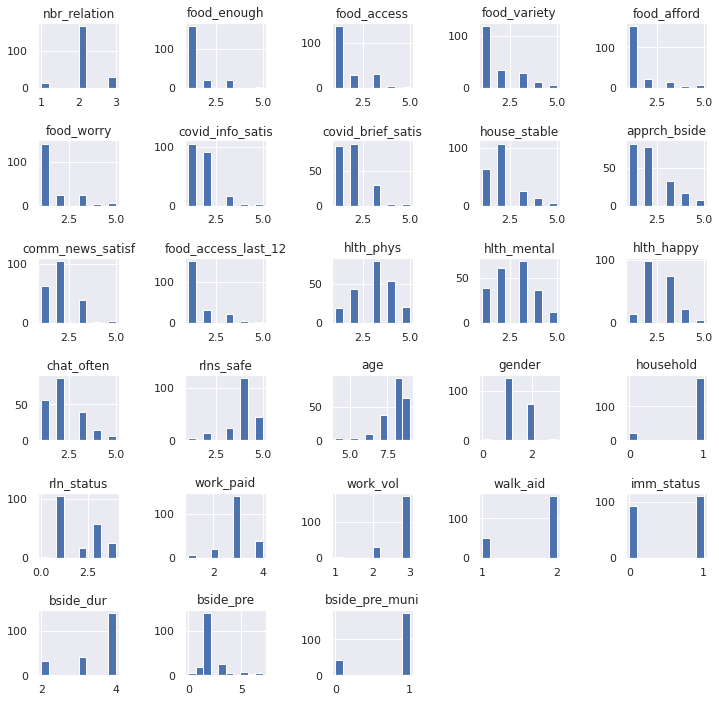

In [43]:
df5 = df4.copy()

df5.hist(figsize = (12,12))
plt.subplots_adjust(hspace=0.8, wspace = 0.8);
# -> replace NA with mode

In [44]:
df5.mode()

,location,nbr_relation,food_enough,food_access,food_variety,food_afford,food_worry,covid_info_satis,covid_brief_satis,house_stable,apprch_bside,comm_news_satisf,food_access_last_12,hlth_phys,hlth_mental,hlth_happy,chat_often,rlns_safe,age,gender,household,rln_status,work_paid,work_vol,walk_aid,imm_status,bside_dur,bside_pre,bside_pre_muni
0,BRIDGEVIEW PLACE,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,3.0,3.0,2.0,2.0,4.0,8.0,1.0,1.0,1.0,3.0,3.0,2.0,1.0,4.0,2.0,1.0


In [45]:
df5.nbr_relation.replace(np.nan, 2.0, inplace=True)
df5.food_enough.replace(np.nan, 1.0, inplace=True)
df5.food_access.replace(np.nan, 1.0, inplace=True)
df5.food_variety.replace(np.nan, 1.0, inplace=True)
df5.food_afford.replace(np.nan, 1.0, inplace=True)
df5.food_worry.replace(np.nan, 1.0, inplace=True)
df5.covid_info_satis.replace(np.nan, 1.0, inplace=True)
df5.covid_brief_satis.replace(np.nan, 2.0, inplace=True)
df5.house_stable.replace(np.nan, 2.0, inplace=True)
df5.apprch_bside.replace(np.nan, 1.0, inplace=True)
df5.comm_news_satisf.replace(np.nan, 2.0, inplace=True)
df5.food_access_last_12.replace(np.nan, 1.0, inplace=True)
df5.hlth_phys.replace(np.nan, 3.0, inplace=True)
df5.hlth_mental.replace(np.nan, 3.0, inplace=True)
df5.hlth_happy.replace(np.nan, 2.0, inplace=True)
df5.chat_often.replace(np.nan, 2.0, inplace=True)
df5.rlns_safe.replace(np.nan, 4.0, inplace=True)
df5.age.replace(np.nan, 8.0, inplace=True)
df5.gender.replace(np.nan, 1.0, inplace=True)
df5.household.replace(np.nan, 1.0, inplace=True)
df5.rln_status.replace(np.nan, 1.0, inplace=True)
df5.work_paid.replace(np.nan, 3.0, inplace=True)
df5.work_vol.replace(np.nan, 3.0, inplace=True)
df5.walk_aid.replace(np.nan, 2.0, inplace=True)
df5.imm_status.replace(np.nan, 1.0, inplace=True)
df5.bside_dur.replace(np.nan, 4.0, inplace=True)
df5.bside_pre.replace(np.nan, 2.0, inplace=True)
df5.bside_pre_muni.replace(np.nan, 1.0, inplace=True)

#### Remove mod-highly correlated variables

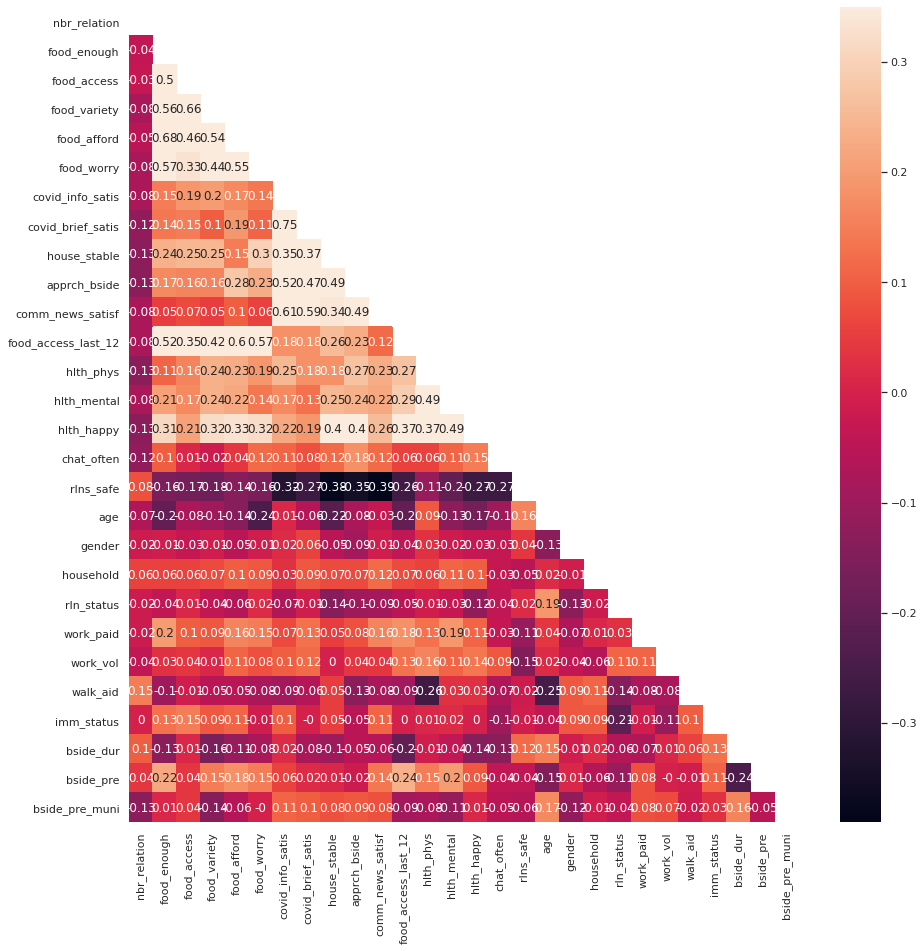

In [47]:
df6 = df5.copy()

def corr_map(df, col):
    corr = df.corr().round(2)
    max_corr = 0.35
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)]=True
    with sns.axes_style('white'):
        f, ax = plt.subplots(figsize = (15,15))
        ax = sns.heatmap(corr, vmax = max_corr, mask = mask,
                        annot=True)

corr_map(df6, df6.columns)

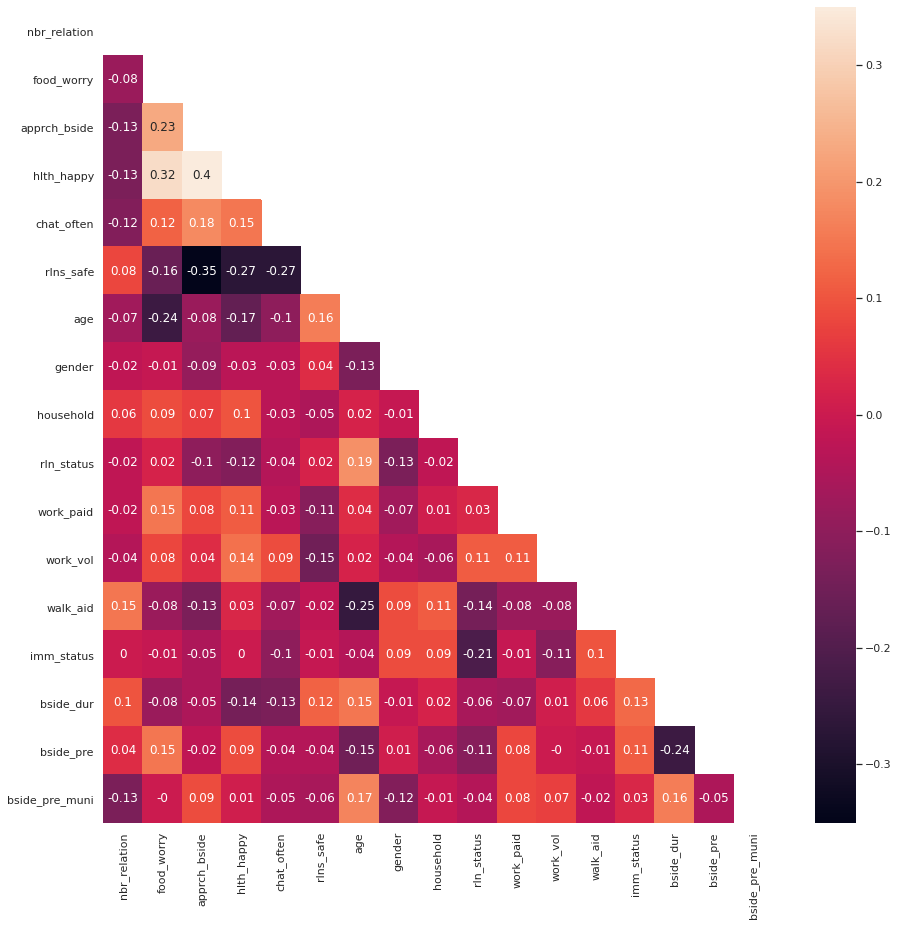

In [48]:
df6 = df6.drop(['food_enough','food_access','food_variety','food_afford','food_access_last_12',
'covid_brief_satis','covid_info_satis','comm_news_satisf','house_stable',
'hlth_phys','hlth_mental'], axis=1)

corr_map(df6, df6.columns)

*Findings*:

The following variables had very similar results:

- food_access, food_variety, food_afford, food_worry, food_access_last_12  -> keep food_worry

-  covid_brief_satis, covid_info_satis, apprch_bside, comm_news_satisf, house_stable -> keep apprch_bside

- hlth_happy, hlth_phys, hlth_mental -> keep hlth_happy


Moderate correlation between apprch_bside and hlth_happy -> keep for now

In [165]:
indiv = df6.copy()

#### **A.1.a. Get group data (location-based)**

In [166]:
group = indiv.location.value_counts()
group = group.to_frame()
group.rename(columns = {'location':'num_resp'},inplace=True)

ordinal = ['nbr_relation', 'food_worry', 'apprch_bside', 'hlth_happy',
  'chat_often', 'rlns_safe', 'age','bside_dur']

for o in ordinal:
    group[o]= indiv.groupby('location')[o].mean().round(1)

# a bit of a stretch, but try to include binaries
binary = ['household', 'walk_aid', 'imm_status', 'bside_pre_muni']
for b in binary:
    group[b]= indiv.groupby('location')[b].mean().round(1)

group.head(3)

,num_resp,nbr_relation,food_worry,apprch_bside,hlth_happy,chat_often,rlns_safe,age,bside_dur,household,walk_aid,imm_status,bside_pre_muni
BRIDGEVIEW PLACE,24,2.1,1.2,1.6,2.5,1.7,4.2,8.0,3.7,0.9,1.8,0.6,0.8
COLEOPY PARK,19,1.9,1.8,2.4,2.8,2.4,4.0,7.8,3.5,0.8,1.7,0.4,0.8
COLLINGWOOD TOWER,16,2.0,1.4,2.4,2.7,2.0,3.6,8.3,3.3,0.9,1.7,0.3,0.9


In [241]:
group.isnull().sum()

num_resp          0
nbr_relation      0
food_worry        0
apprch_bside      0
hlth_happy        0
chat_often        0
rlns_safe         0
age               0
bside_dur         0
household         0
walk_aid          0
imm_status        0
bside_pre_muni    0
dtype: int64

#### **A.2. Assets and Amenities Data**

In [50]:
!ls datasets

2020			      2020_brightside_data_variable_codebook_0704.csv
2020_brightside_codebook.csv  Amenity_Rooms_and_Assets.csv
2020_brightside_data.csv


In [60]:
assets = pd.read_csv('/content/DFGVancouver_Brightside2021/datasets/Amenity_Rooms_and_Assets.csv')
assets.head(3)

,Nos. of Suites,Building Names,Building Code,Address,Postal Code,No. of Suite Type,Build Year,Resident Profile,BC Housing Registration (required),Pet Friendly,Amenity room,Lounge,Other,Static Chairs,Movable Chairs,Division,Tables,Appliances,DVD Player,Microwave,Stove,Fridge,Television,Sink,Comments,Recommended Occupancy,Access,Picture,Type of Flooring,Type of Flooring.1,Bike Storage,Location,Rent - Lowest Range,Rent - Highest Range,Average Rent,Median Rent,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39
0,64,ALICE SAUNDERS,AS,2924 Venables St.,V5K 4X8,"Bachelor (55), 1BDR (9)",1977.0,Seniors,False,False,Yes,NaN,Games Room,9.0,19.0,1,10.0,"Sink, Television",False,False,False,False,True,True,. Games room has billiards and shuffleboard ta...,20-25,OPEN,Y,C,Carpeting,Y,119A,475.0,779.00,699.50,772.00,NaN,NaN,NaN,NaN
1,21,ARBUTUS COURT,AC,2085 W. 5th Ave.,V6J 1P8,1BDR (21),1964.0,"Families, People with Disabilities, Seniors",False,False,No,NaN,NaN,NaN,NaN,1,NaN,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,Y,Parkade,475.0,"1,553.00",886.10,803.00,NaN,NaN,NaN,NaN
2,16,BURRARD MANOR,BM,2330 Balsam St,V6K 3M8,"Bachelor (15), 1BDR (1)",1967.0,Seniors,False,False,No,NaN,NaN,NaN,NaN,1,NaN,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,475.0,"1,084.00",747.69,787.50,NaN,NaN,NaN,NaN


In [54]:
assets['Building Names'].nunique()

26

#### Choose significant assets variables

In [61]:
assets = assets[['Building Names','Nos. of Suites','Postal Code','Build Year','Average Rent']]
assets.rename(columns = {'Building Names': 'location',
                         'Nos. of Suites': 'suites',
                         'Postal Code': 'postal',
                         'Build Year': 'build_year',
                         'Average Rent': 'rent'}, inplace=True)


In [62]:
assets.head(3)

,location,suites,postal,build_year,rent
0,ALICE SAUNDERS,64,V5K 4X8,1977.0,699.50
1,ARBUTUS COURT,21,V6J 1P8,1964.0,886.10
2,BURRARD MANOR,16,V6K 3M8,1967.0,747.69


#### *Findings*:

There are 26 properties in the dataset.

- suites can be used to assess response rate

- postal can be used for neighbourhood assessment

- rent can be used as auxiliary for income

- can merge with grouped means

#### **A.3.  Crime Data**

Unable to place full crimedata_csv_all_years.csv to github due to large file size.

Trimmed to 2020 data.

In [ ]:
# crime = pd.read_csv('/work/Geographic Factors/crimedata_csv_all_years.csv')
# crime = crime [ crime.YEAR == 2020]
# crime2= ((crime.groupby('NEIGHBOURHOOD')['TYPE'].count() / len(crime)) *100).round(1)
# crime2 = crime2.to_frame()
# crime2.to_csv('crime.csv')

#### *Findings*:

-  There were 27 neighbourhoods considered by the VPD.  These do not correspond with the general neighbourhoods in the Bside website.

-  There were 37 347 crimes committed in 2020.

In [76]:
!ls 

 crime.csv	   DFG_B_df10.csv	   rodriguez_2021_8_14_1140am.ipynb
 crime.ipynb	   means		  "surv'20_EDA_9_5_3pm.ipynb"
 data_2020.csv	   means_ass_crime.csv	  'surv'\''20_EDA_9_8_1pm (1).ipynb'
 data_2020.ipynb   means_ass_crime.ipynb   survey2020_9_4_6pm.ipynb
 datasets	   README.md		   survey2020_clean_9_5_1pm.ipynb


In [79]:
crime = pd.read_csv('/content/DFGVancouver_Brightside2021/crime.csv')

In [78]:
crime.rename(columns = {'NEIGHBOURHOOD': 'neighbourhood',
'TYPE':'crime_rate'}, inplace=True)
crime.head(3)

,neighbourhood,crime_rate
0,Arbutus Ridge,1.0
1,Central Business District,27.6
2,Dunbar-Southlands,1.4


#### **A.4.  Merge Grouped Data**

-  Merge Survey Grouped Data with Assets on 'location'

- Merge Survey Grouped - Assets with Crime on 'neighbourhood'

In [242]:
group_assets = group.merge(assets, left_index = True, right_on ='location')

In [243]:
group_assets.head(1)

,num_resp,nbr_relation,food_worry,apprch_bside,hlth_happy,chat_often,rlns_safe,age,bside_dur,household,walk_aid,imm_status,bside_pre_muni,location,suites,postal,build_year,rent
17,24,2.1,1.2,1.6,2.5,1.7,4.2,8.0,3.7,0.9,1.8,0.6,0.8,BRIDGEVIEW PLACE,72,V6B 5X8,1993.0,623.78


In [244]:
group_assets['neighbourhood'] = group_assets['postal']
group_assets.neighbourhood.replace({'V5R 5C6': 'Renfrew-Collingwood',
                            'V5Z 1B3' : 'Fairview',
                            'V6G 1K1' :  'Stanley Park',
                            'V6K 1L9': 'Kitsilano',
                            'V5T 1J9': 'Mount Pleasant',
                            'V6B 5X8': 'Central Business District',
                            'V5K 4X8': 'Hastings-Sunrise',
                            'V6K 3M8': 'Kitsilano',
                            'V5R 2K6': 'Renfrew-Collingwood',
                            'V5R 5V6': 'Renfrew-Collingwood',
                            'V5R 3N3': 'Rendrew-Collingwood',
                            'V5N 5X1': 'Grandview-Woodland',
                            'V6J 1P8': 'Kitsilano',
                            'V5N 2A1': 'Grandview-Woodland',
                            'V6E 1R2': 'West End',
                            'V6E 1S2': 'West End',
                            'V5N 1Y6': 'Kensington-Cedar Cottage',
                            'V5R 4S2': 'Renfrew-Collingwood',
                            'V6H 2S2': 'Fairview',
                            'V6P 4W9': 'Marpole',
                            'V5N 2B6': 'Kensington-Cedar Cottage',
                            'V5P 1K5': 'Victoria-Fraserview',
                            'V5N 1P3': 'Grandview-Woodland',
                            'V6M 3Y1': 'Kerrisdale'

                            }, inplace=True)

In [245]:
crime.rename(columns = {'NEIGHBOURHOOD': 'neighbourhood',
                        'TYPE': 'neigh_crime_rate'}, inplace=True)

group_data = group_assets.merge(crime, on = 'neighbourhood')

In [249]:
group_data['build_year'] = group_data['build_year'].fillna(group_data['build_year'].median())
group_data['rent'] = group_data['rent'].fillna(group_data['rent'].mean())
group_data.isnull().sum()

num_resp            0
nbr_relation        0
food_worry          0
apprch_bside        0
hlth_happy          0
chat_often          0
rlns_safe           0
age                 0
bside_dur           0
household           0
walk_aid            0
imm_status          0
bside_pre_muni      0
location            0
suites              0
postal              0
build_year          0
rent                0
neighbourhood       0
neigh_crime_rate    0
dtype: int64

In [251]:
group_data= group_data.set_index('location')
group_data.head(3)

,num_resp,nbr_relation,food_worry,apprch_bside,hlth_happy,chat_often,rlns_safe,age,bside_dur,household,walk_aid,imm_status,bside_pre_muni,suites,postal,build_year,rent,neighbourhood,neigh_crime_rate
location,,,,,,,,,,,,,,,,,,,
BRIDGEVIEW PLACE,24,2.1,1.2,1.6,2.5,1.7,4.2,8.0,3.7,0.9,1.8,0.6,0.8,72,V6B 5X8,1993.0,623.78,Central Business District,27.6
COLLINGWOOD TOWER,16,2.0,1.4,2.4,2.7,2.0,3.6,8.3,3.3,0.9,1.7,0.3,0.9,79,V5R 5V6,1977.0,494.75,Renfrew-Collingwood,5.8
LIONS VIEW BLDG II,15,2.3,1.6,2.1,3.0,1.9,4.1,8.1,3.5,0.9,1.8,0.6,0.7,47,V5R 5C6,1994.0,492.39,Renfrew-Collingwood,5.8


### **B.  Data Representation**


In [122]:
rep = group_data[['num_resp', 'suites']]

# get percentage per var
# then percentage of num_resp relative to suites
rep['num_resp_perc'] = ((rep.num_resp / rep.num_resp.sum())*100).round(1)

rep['suites_perc'] = ((rep.suites / rep.suites.sum() )*100).round(1)

# percentage distribution of respondents relative to building representation
rep['representation'] = (rep.num_resp_perc / rep.suites_perc).round(1)

group_data['representation'] = rep.representation

rep.head(2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

,num_resp,suites,num_resp_perc,suites_perc,representation
location,,,,,
BRIDGEVIEW PLACE,24,72,12.6,8.8,1.4
COLLINGWOOD TOWER,16,79,8.4,9.6,0.9


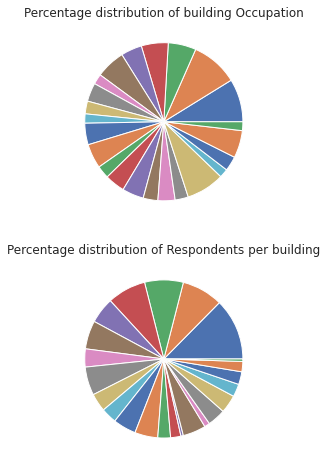

In [123]:
plt.figure(figsize=(8,8))

plt.subplot(211)
rep.suites_perc.plot(kind='pie',labels=None)
plt.title('Percentage distribution of building Occupation')
plt.ylabel(None);

plt.subplot(212)
rep.num_resp_perc.plot(kind='pie',labels=None);
plt.title('Percentage distribution of Respondents per building')
plt.ylabel(None);

In [125]:
# buildings with high respondent representation
(rep [ rep['representation'] >= 1.0]['representation']).sort_values(ascending=False).head()

location
MAGNOLO MANOR        1.8
BURRARD MANOR        1.7
SOROPTIMIST LIONS    1.6
MORELAND KENNEDY     1.5
FLORENCE MANOR       1.4
Name: representation, dtype: float64

In [128]:
# buildings with low respondent representation
(rep [ rep['representation'] < 1.0]['representation']).sort_values(ascending=False).tail()

location
MUIR MANOR              0.5
MACLEOD MANOR           0.4
WILSON HEIGHTS MANOR    0.3
KINGS DAUGHTERS         0.3
EDWARD BYERS            0.1
Name: representation, dtype: float64

#### *Findings*:

The properties are not equally represented.  Results may poorly describe the situation of the least represented buildings.

Allow for now to be able to generalize data.

Try to make subsequent surveys more balanced.

###  **C.  Study Questions**

#### **C.1.  Perspective of Data with regards to Brightside Mandate**

https://brightsidehomes.ca/who-we-are/our-approach/

Brightside places important focus on community development that fosters **strong social connections** and **resilience** among its residents.

#### ***Mission***

Build resilient communities, throughout Metro Vancouver, with **safe** and secure homes for those struggling to meet the demands of market housing.

#### ***Vision***

A future where people of all income levels have a home within a vibrant and **healthy community**.

#### ***Values***

To maintain Clarity, we must be fair, open, and consistent.

To be Inclusive, we must be respectful, approachable, and empathetic.

To be Progressive, we must be adaptive, flexible, and pro-active.

To support Social Justice, we must be intentional in highlighting issues, take action to create **equitable opportunity**, and actively advocate for our vision.

To be Resourceful, we must be rigorous, diligent, and be great problem solvers.

https://brightsidehomes.ca/

Our residents are **seniors, families and people with disabilities** who are able to live independently.

*Note*:

Highlighted items are those that can be answered retrospectively.

### **C.2. Questions (Retrospective):**

1.  What is the tenant profile for 2020?

  a.  age

  b.  gender

  c.  marital/ household status

  d.  work status

  e.  disability

  f.  immigration status

2.  Is the community healthy?

  a.  basic needs met

  b.  safety met

  c.  social interaction adequate

3.  Are the tenants happy with Brightside?

  a.  Are tenants staying with the foundation? (bside_dur)

  b.  Do tenants see Brightside as approachable? (apprch_bside)

4.  What are possible rooms for improvement?

  a.  What affects the perception of approachability?

  b.  Can one variable predict another?

  c.  What are things that could be addressed?

### **D.  Data Analyses Focused on answering above Questions**

**D.1.a.  What is the age profile of tenants?**

In [131]:
import scipy.stats as stat
import statsmodels.stats.multicomp as mc
from scipy.stats import chisquare
import matplotlib.pyplot as plt

,age
25-34,2.0
35-44,1.0
45-54,4.0
55-64,17.0
65-74,48.0
> 75,28.0


p value=  0.0


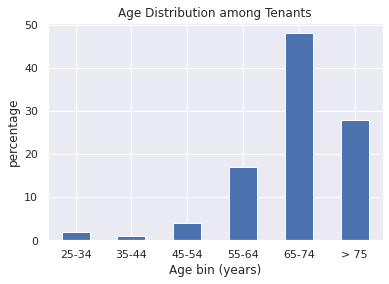

In [167]:
age = ((indiv.age.value_counts(normalize=True).sort_index())*100).round(0)

age.rename( {4: '25-34', 
                     5: '35-44',
                     6: '45-54',
                     7: '55-64',
                     8: '65-74',
                     9: '> 75'}, inplace=True)

display(age.to_frame())

st, p = chisquare(age)
print('p value= ', p.round(3))
 
age.plot(kind='bar', rot = 0)
plt.xlabel('Age bin (years)')
plt.ylabel('percentage')
plt.title('Age Distribution among Tenants');

#### *Findings*:

-  Majority of the tenants are older than 65 years.

-  The age distribution is significantly different.

#### *Interpretation*:

With the 'senior' definition based on OAS distribution ([link text](https://www.canada.ca/en/services/benefits/publicpensions/cpp/old-age-security.html://)), most of the tenants correspond to the profile of 'senior'.

#### **D.1.b.  What is the Gender profile of the tenants?**

,gender
other,1.0
female,64.0
male,33.0
non-binary,1.0


p value=  0.0


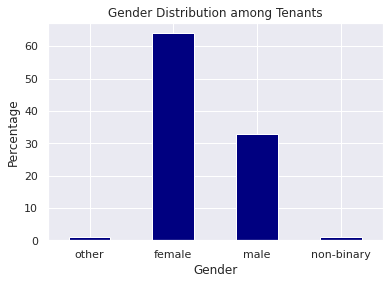

In [353]:
gender = ((indiv.gender.value_counts(normalize=True).sort_index())*100).round(0)

gender.rename( {0:'other',
                1: 'female',
                2: 'male',
                3: 'non-binary'}, inplace=True)

display(gender.to_frame())

st, p = chisquare(gender)
print('p value= ', p.round(3))
 
gender.plot(kind='bar', rot = 0, colormap='jet')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.title('Gender Distribution among Tenants');

,gender
female,63.0
male,37.0


p value=  0.009


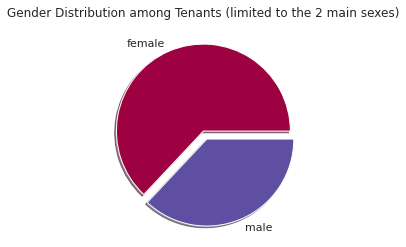

In [169]:
male = indiv.gender [ df4.gender == 2]
female = indiv.gender [ df4.gender ==1]
sex = pd.concat([male,  female])
sex_val = ((sex.value_counts(normalize=True).sort_index())*100).round(0)


sex_val.rename( {   1: 'female',
                2: 'male',
                }, inplace=True)

display(sex_val.to_frame())

st, p = chisquare(sex_val)
print('p value= ', p.round(3))
 
sex_val.plot(kind='pie', rot = 0, shadow=True, explode = (0,0.1),cmap='Spectral')
plt.xlabel(None)
plt.ylabel(None)
plt.title('Gender Distribution among Tenants (limited to the 2 main sexes)');

#### *Findings*:

Females comprise of 61-63% of the tenants.

#### **D.1.c.  What is the marital status/ household profile of the tenants?**

,rln_status
other,1.0
single,54.0
married/ live-in,8.0
divorced/ separated,26.0
widowed,11.0


p value=  0.0


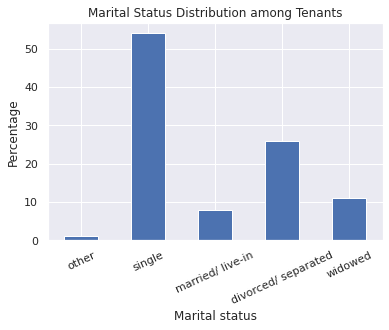

In [178]:
# rln_status
rel = ((indiv.rln_status.value_counts(normalize=True).sort_index())*100).round(0)

rel.rename( {0:'other',
             1:'single',
                2: 'married/ live-in',
                3: 'divorced/ separated',
                4: 'widowed'}, inplace=True)

display(rel.to_frame())

st, p = chisquare(rel)
print('p value= ', p.round(3))
 
rel.plot(kind='bar', rot = 25)
plt.xlabel('Marital status')
plt.ylabel('Percentage')
plt.title('Marital Status Distribution among Tenants');

,household
not alone,10.0
living alone,90.0


p value=  0.0


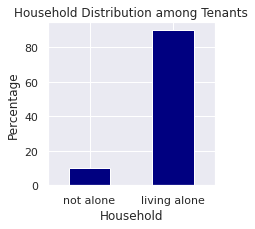

In [352]:
# household
hhold = ((indiv.household.value_counts(normalize=True).sort_index())*100).round(0)

hhold.rename( {0:'not alone',
             1:'living alone',
                }, inplace=True)

display(hhold.to_frame())

st, p = chisquare(hhold)
print('p value= ', p.round(3))

plt.figure(figsize=(3,3)) 
hhold.plot(kind='bar', rot = 0, colormap = 'jet')
plt.xlabel('Household')
plt.ylabel('Percentage')
plt.title('Household Distribution among Tenants');

#### *Findings*:

- More than half of the tenants are single.

- Tenants are mostly individuals living by themselves.

#### *Interpretation*:

Individuals predominate the tenant population.

Families are less represented.

#### **D.1.d.  What is the work profile of the tenants?**



,work_paid
full-time,3.0
part-time,9.0
retired,71.0
not_working,17.0


p value=  0.0


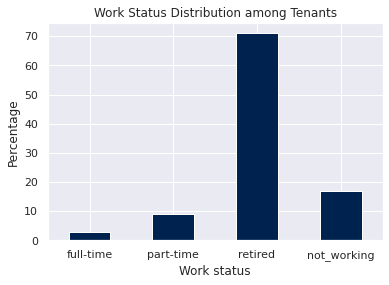

In [321]:
# work_paid
wpaid = ((indiv.work_paid.value_counts(normalize=True).sort_index())*100).round(0)

wpaid.rename( {
             1: 'full-time',
             2: 'part-time',
             3: 'retired',
             4: 'not_working'
                }, inplace=True)

display(wpaid.to_frame())

st, p = chisquare(wpaid)
print('p value= ', p.round(3))
 
wpaid.plot(kind='bar', rot = 0, colormap = 'cividis')
plt.xlabel('Work status')
plt.ylabel('Percentage')
plt.title('Work Status Distribution among Tenants');

,work_vol
full-time,1.0
part-time,14.0
no,85.0


p value=  0.0


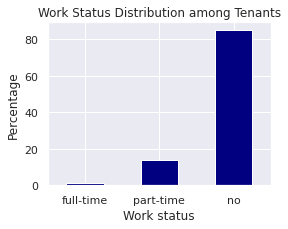

In [325]:
# work_vol
wvol = ((indiv.work_vol.value_counts(normalize=True).sort_index())*100).round(0)

wvol.rename( {
             1: 'full-time',
             2: 'part-time',
             3: 'no',
                }, inplace=True)

display(wvol.to_frame())

st, p = chisquare(wvol)
print('p value= ', p.round(3))

plt.figure(figsize = (4,3)) 
wvol.plot(kind='bar', rot = 0, colormap = 'jet')
plt.xlabel('Work status')
plt.ylabel('Percentage')
plt.title('Work Status Distribution among Tenants');

#### *Findings*:

Majority of the tenants are retired and are not participating in volunteer work.

#### **D.1.e.  What is the disability profile of the tenants?**

(As represented by requirement for walking aids for ambulation)




,walk_aid
yes,23.0
no,77.0


p value=  0.0


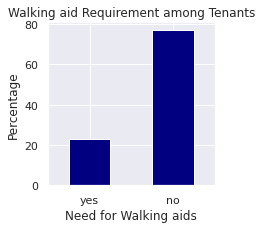

In [351]:
# walk_aid
aid = ((indiv.walk_aid.value_counts(normalize=True).sort_index())*100).round(0)

aid.rename( {
             1: 'yes',
             2: 'no',
                }, inplace=True)

display(aid.to_frame())

st, p = chisquare(aid)
print('p value= ', p.round(3))

plt.figure(figsize=(3,3)) 
aid.plot(kind='bar', rot = 0, colormap='jet')
plt.xlabel('Need for Walking aids')
plt.ylabel('Percentage')
plt.title('Walking aid Requirement among Tenants');

#### *Findings*:

Only less than a quarter of the tenants need walking aids.

#### *Interpretation*:

If walking aids can be taken as a representative variable for disability, most of the tenants are not disabled.

#### **D.1.f.  What is the immigration profile of the tenants?**

,imm_status
immigrated to Canada,42.0
born in Canada,58.0


p value=  0.11


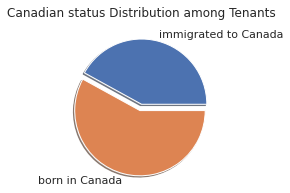

In [316]:
# imm_status
imm = ((indiv.imm_status.value_counts(normalize=True).sort_index())*100).round(0)

imm.rename( {
             0: 'immigrated to Canada',
             1: 'born in Canada',
                }, inplace=True)

display(imm.to_frame())

st, p = chisquare(imm)
print('p value= ', p.round(3))

plt.figure(figsize=(4,3)) 
imm.plot(kind='pie', shadow=True, explode =(0,0.1))
plt.xlabel(None)
plt.ylabel(None)
plt.title('Canadian status Distribution among Tenants');

#### *Findings*:

There is no significant difference between immigration status among tenants.

#### *Interpretation*:

The selection for tenancy with regards to citizenship is equitable.


#### **Summary of Findings for Tenant Profile:**

- Most of the tenants are female seniors, living by themselves, with no requirement for walking aids.

-  Families and disabled people ***could*** be underrepresented.

-  Tenancy for immigration status is equitable.

#### **D.2.  Is the Community Healthy?**

#### **D.2.a.  Are the tenants' basic needs met?**


*   food
*   health


,food_worry
1.0 = never,74.0
2.0,11.0
3.0,11.0
4.0,2.0
5.0 = all the time,2.0


p value=  0.0


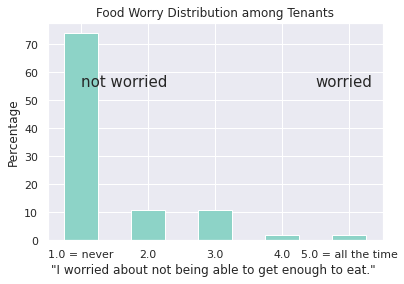

In [350]:
# food_worry
food = ((indiv.food_worry.value_counts(normalize=True).sort_index())*100).round(0)

food.rename( {
             1: '1.0 = never',
             5: '5.0 = all the time',
                }, inplace=True)

display(food.to_frame())

st, p = chisquare(food)
print('p value= ', p.round(3))
 
food.plot(kind='bar', rot = 0, colormap = 'Set3')
plt.xlabel('"I worried about not being able to get enough to eat." ')
plt.ylabel('Percentage')
plt.title('Food Worry Distribution among Tenants');
plt.text(0, 55, 'not worried', fontsize = 15)
plt.text (3.5, 55, 'worried', fontsize = 15);

,hlth_happy
1.0 = very happy,6.0
2.0,48.0
3.0,34.0
4.0,10.0
5.0 = very unhappy,2.0


p value=  0.0


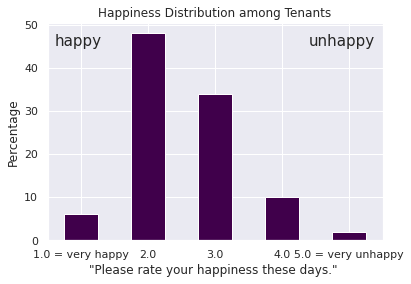

In [330]:
# hlth_happy
hlth = ((indiv.hlth_happy.value_counts(normalize=True).sort_index())*100).round(0)

hlth.rename( {
             1: '1.0 = very happy',
             5: '5.0 = very unhappy',
                }, inplace=True)

display(hlth.to_frame())

st, p = chisquare(hlth)
print('p value= ', p.round(3))
 
hlth.plot(kind='bar', rot = 0, colormap = 'PRGn')
plt.xlabel('"Please rate your happiness these days." ')
plt.ylabel('Percentage')
plt.title('Happiness Distribution among Tenants');
plt.text(-0.4, 45, 'happy', fontsize = 15)
plt.text (3.4, 45, 'unhappy', fontsize = 15);

#### *Findings*:

Most tenants are not worried about food.

Most tenants are in the range of moderately happy/ neutral.  

#### *Assumption*:

Absence of food worry and presence of happiness can be reflective of fulfilled basic needs.

#### **D.2.b.  Are the tenants' Safety needs met?**

,rlns_safe
1.0 = strongly disagree,2.0
2.0,6.0
3.0,11.0
4.0,61.0
5.0 = strongly agree,20.0


p value=  0.0


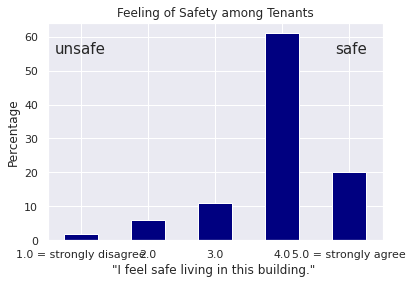

In [354]:
# rlns_safe
safe = ((indiv.rlns_safe.value_counts(normalize=True).sort_index())*100).round(0)

safe.rename( {
             1: '1.0 = strongly disagree',
             5: '5.0 = strongly agree',
                }, inplace=True)

display(safe.to_frame())

st, p = chisquare(safe)
print('p value= ', p.round(3))
 
safe.plot(kind='bar', rot = 0, colormap = 'jet')
plt.xlabel('"I feel safe living in this building." ')
plt.ylabel('Percentage')
plt.title('Feeling of Safety among Tenants');
plt.text(-0.4, 55, 'unsafe', fontsize = 15)
plt.text (3.8, 55, 'safe', fontsize = 15);

#### *Findings*:

Most tenants feel safe.

#### **D.2.c.  Are the tenants' Social Interaction needs met?**

,chat_often
1.0 = everyday,25.0
2.0,48.0
3.0,17.0
4.0,6.0
5.0 = never,3.0


p value=  0.0


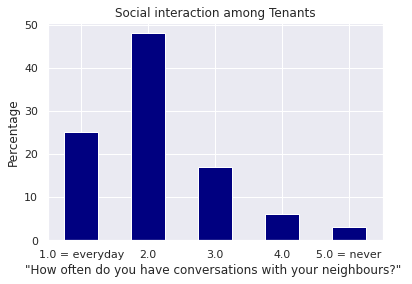

In [355]:
# chat_often
chat = ((indiv.chat_often.value_counts(normalize=True).sort_index())*100).round(0)

chat.rename( {
             1: '1.0 = everyday',
             5: '5.0 = never',
                }, inplace=True)

display(chat.to_frame())

st, p = chisquare(chat)
print('p value= ', p.round(3))
 
chat.plot(kind='bar', rot = 0, colormap = 'jet')
plt.xlabel('"How often do you have conversations with your neighbours?" ')
plt.ylabel('Percentage')
plt.title('Social interaction among Tenants');
#plt.text(-0.4, 55, 'unsafe', fontsize = 15)
#plt.text (3.8, 55, 'safe', fontsize = 15);

#### *Findings*:

Most tenants interact with their neighbours a few times a week.


#### *Interpretation*:

Giving allowance that different people have different socialization needs, it is at least evident that tenants can socialize frequently if they wanted to.

#### **Summary of Findings for Community Health:**

Most tenants' basic needs (food, happiness), safety needs and social interaction needs are met.

#### **D.3.  Are tenants satisfied with Brightside?**

- bside_dur

- apprch_bside

#### **D.3.a.  Are tenants staying?**

,bside_dur
1-3,14.0
4-6,18.0
>6,68.0


p value=  0.0


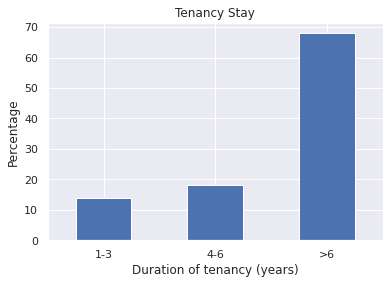

In [210]:
# bside_dur
dur = ((indiv.bside_dur.value_counts(normalize=True).sort_index())*100).round(0)

dur.rename( {
             1: '< 1',
             2: '1-3',
             3: '4-6',
             4: '>6'
                }, inplace=True)

display(dur.to_frame())

st, p = chisquare(dur)
print('p value= ', p.round(3))
 
dur.plot(kind='bar', rot = 0)
plt.xlabel('Duration of tenancy (years)')
plt.ylabel('Percentage')
plt.title('Tenancy Stay');
#plt.text(-0.4, 55, 'unsafe', fontsize = 15)
#plt.text (3.8, 55, 'safe', fontsize = 15);

#### *Findings*:

More than two-thirds of the tenants have been with Brightside for more than 6 years.

#### *Interpretation*:

Assuming that long duration of stay is a reflection of satisfaction and loyalty, the tenants are happy with Brightside.

#### **D.3.b.  Do tenants find Brightside as approachable?**

,apprch_bside
very,40.0
2.0,35.0
3.0,15.0
4.0,8.0
not at all,3.0


p value=  0.0


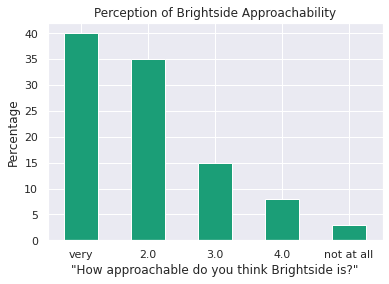

In [335]:
# apprch_bside
app = ((indiv.apprch_bside.value_counts(normalize=True).sort_index())*100).round(0)

app.rename( {
             1: 'very',
             5: 'not at all'
                }, inplace=True)

display(app.to_frame())

st, p = chisquare(app)
print('p value= ', p.round(3))
 
app.plot(kind='bar', rot = 0, colormap = 'Dark2')
plt.xlabel('"How approachable do you think Brightside is?"')
plt.ylabel('Percentage')
plt.title('Perception of Brightside Approachability');
#plt.text(-0.4, 55, 'unsafe', fontsize = 15)
#plt.text (3.8, 55, 'safe', fontsize = 15);

#### *Findings*:

Most tenants find Brightside approachable.

#### **Summary of Findings for Brightside Perception:**

Most tenants perceive Brightside as approachable, and tend to stay with them for years.

#### **D.4.  What are possible rooms for improvement?**

For efforts of improving the organization and eventually increasing tenant satisfaction.

#### **D.4.a.  What affects the perception of approachability?**

**Location**

p val 0.009


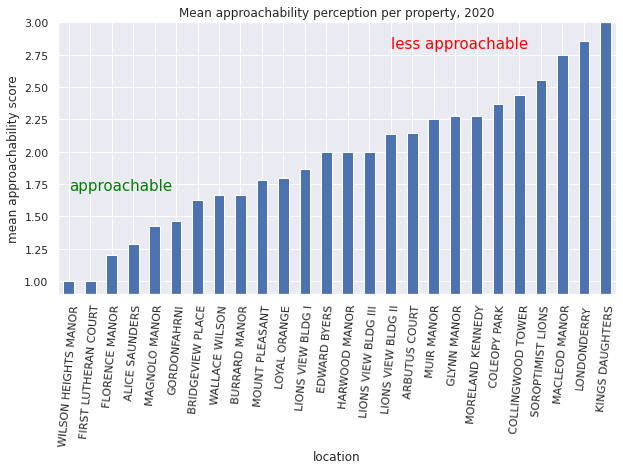

In [356]:
indiv.groupby('location')['apprch_bside'].mean().sort_values()
val = indiv.groupby('location')['apprch_bside'].mean().sort_values()
plt.figure(figsize = (10,5))
val.plot(kind = 'bar', rot = 85);
plt.xlabel('location')
plt.ylabel('mean approachability score')
plt.title('Mean approachability perception per property, 2020')
plt.text(0,1.7, 'approachable', fontsize=15, color='green')
plt.text(15, 2.8, 'less approachable', fontsize=15, color = 'red')
plt.ylim(0.9, 3.0);

val = pd.crosstab(indiv.location, indiv.apprch_bside)
x2, p, dof, exp = stat.chi2_contingency(val)
print('p val', p.round(3))

*Findings*:  

Perception of approchability is significantly different between properties.

Tenants from Wilson Heights Manor and First Lutheran Court are very satisfied with Brightside.

Tenants from Londonderry and King's Daughters are least satisfied.


#### **What could explain these differences in perception between different properties?**

- rent

- crime

In [253]:
group_data.neighbourhood.value_counts().head()

Grandview-Woodland          4
Renfrew-Collingwood         4
Kitsilano                   3
Kensington-Cedar Cottage    2
Fairview                    2
Name: neighbourhood, dtype: int64

In [254]:
# mean rent per properties' neighbourhood
group_data.groupby('neighbourhood')['rent'].mean().sort_values(ascending=False)

neighbourhood
Marpole                      835.59000
Kitsilano                    831.35000
West End                     807.42500
Kerrisdale                   795.81000
Grandview-Woodland           764.19369
Hastings-Sunrise             699.50000
Fairview                     689.59500
Kensington-Cedar Cottage     683.59500
Central Business District    623.78000
Mount Pleasant               601.00000
Renfrew-Collingwood          572.17250
Victoria-Fraserview          522.57000
Name: rent, dtype: float64

In [256]:
# top three neighbourhoods with the highest rents
print(group_data[group_data.neighbourhood == 'Marpole'].index)
print(group_data[group_data.neighbourhood == 'Kitsilano'].index)
print(group_data[group_data.neighbourhood == 'West End'].index)

Index(['MACLEOD MANOR'], dtype='object', name='location')
Index(['MORELAND KENNEDY', 'ARBUTUS COURT', 'BURRARD MANOR'], dtype='object', name='location')
Index(['FLORENCE MANOR', 'HARWOOD MANOR'], dtype='object', name='location')


In [257]:
# lowest rents
print(group_data[group_data.neighbourhood == 'Victoria-Fraserview'].index)
print(group_data[group_data.neighbourhood == 'Renfrew-Collingwood'].index)
print(group_data[group_data.neighbourhood == 'Mount Pleasant'].index)

Index(['WILSON HEIGHTS MANOR'], dtype='object', name='location')
Index(['COLLINGWOOD TOWER', 'LIONS VIEW BLDG II', 'LIONS VIEW BLDG I',
       'LIONS VIEW BLDG III'],
      dtype='object', name='location')
Index(['MOUNT PLEASANT'], dtype='object', name='location')


location
MUIR MANOR              989.46
MAGNOLO MANOR           903.88
ARBUTUS COURT           886.10
MORELAND KENNEDY        860.26
FLORENCE MANOR          835.93
MACLEOD MANOR           835.59
LIONS VIEW BLDG III     807.06
LONDONDERRY             795.81
HARWOOD MANOR           778.92
SOROPTIMIST LIONS       753.12
BURRARD MANOR           747.69
EDWARD BYERS            707.78
LOYAL ORANGE            707.78
ALICE SAUNDERS          699.50
WALLACE WILSON          651.75
BRIDGEVIEW PLACE        623.78
KINGS DAUGHTERS         614.07
MOUNT PLEASANT          601.00
WILSON HEIGHTS MANOR    522.57
COLLINGWOOD TOWER       494.75
LIONS VIEW BLDG I       494.49
LIONS VIEW BLDG II      492.39
GLYNN MANOR             475.31
Name: rent, dtype: float64


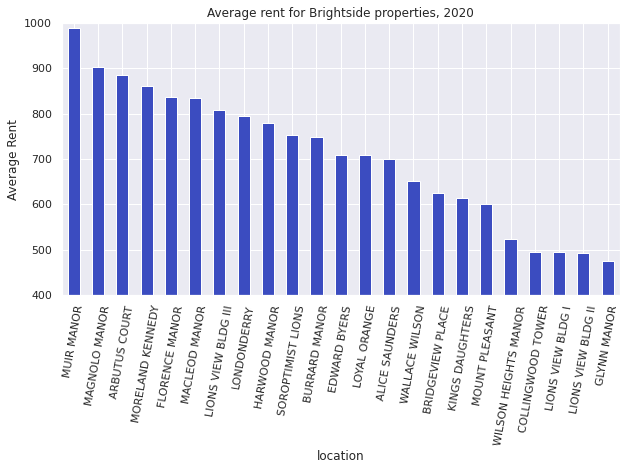

In [339]:
print(group_data.rent.sort_values(ascending=False).round(2))

plt.figure(figsize=(10,5))
group_data.rent.sort_values(ascending=False).plot(kind='bar',rot=80, colormap = 'coolwarm')
plt.ylabel('Average Rent')
plt.title('Average rent for Brightside properties, 2020')
plt.ylim(400,1000);

In [264]:
group_data[['apprch_bside','rent']].corr()

,apprch_bside,rent
apprch_bside,1.000000,0.063797
rent,0.063797,1.000000


#### *Findings*:

Amount of rent is not associated with location's perception of Brightside approachability.

#### **Are the properties located in reasonably safe areas?**

neighbourhood
Central Business District    27.6
West End                      8.3
Mount Pleasant                6.6
Renfrew-Collingwood           5.8
Fairview                      5.7
Grandview-Woodland            5.1
Kitsilano                     4.8
Kensington-Cedar Cottage      4.5
Hastings-Sunrise              3.4
Marpole                       2.5
Victoria-Fraserview           1.7
Kerrisdale                    1.2
Name: neigh_crime_rate, dtype: float64


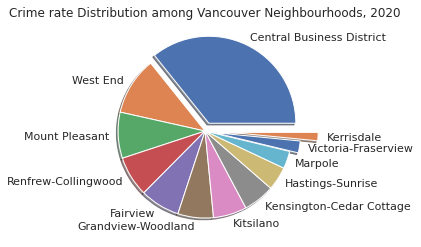

In [268]:
print(group_data.groupby('neighbourhood')['neigh_crime_rate'].mean().sort_values(ascending=False))

(group_data.groupby('neighbourhood')['neigh_crime_rate'].mean().sort_values(ascending=False)).plot(kind='pie',
     shadow=True, explode = (0.1,0,0,0,0,0,0,0,0,0,0.1,0.3))
plt.ylabel(None)
plt.title('Crime rate Distribution among Vancouver Neighbourhoods, 2020');

In [269]:
group_data[group_data.neighbourhood == 'Central Business District'].index

Index(['BRIDGEVIEW PLACE'], dtype='object', name='location')

In [271]:
group_data[group_data.neighbourhood == 'Kerrisdale'].index

Index(['LONDONDERRY'], dtype='object', name='location')

#### *Findings*:

The CBD neighbourhood (Bridgeview Place) has the highest associated crime rate at 27.6%.  (Comparative lower rent)


Kerrisdale neighbourhood (Londonderry) offers the lowest neighbourhood crime rate at 1.2%.  (Comparative higher rent)

#### **4.b. Can one variable predict another?**

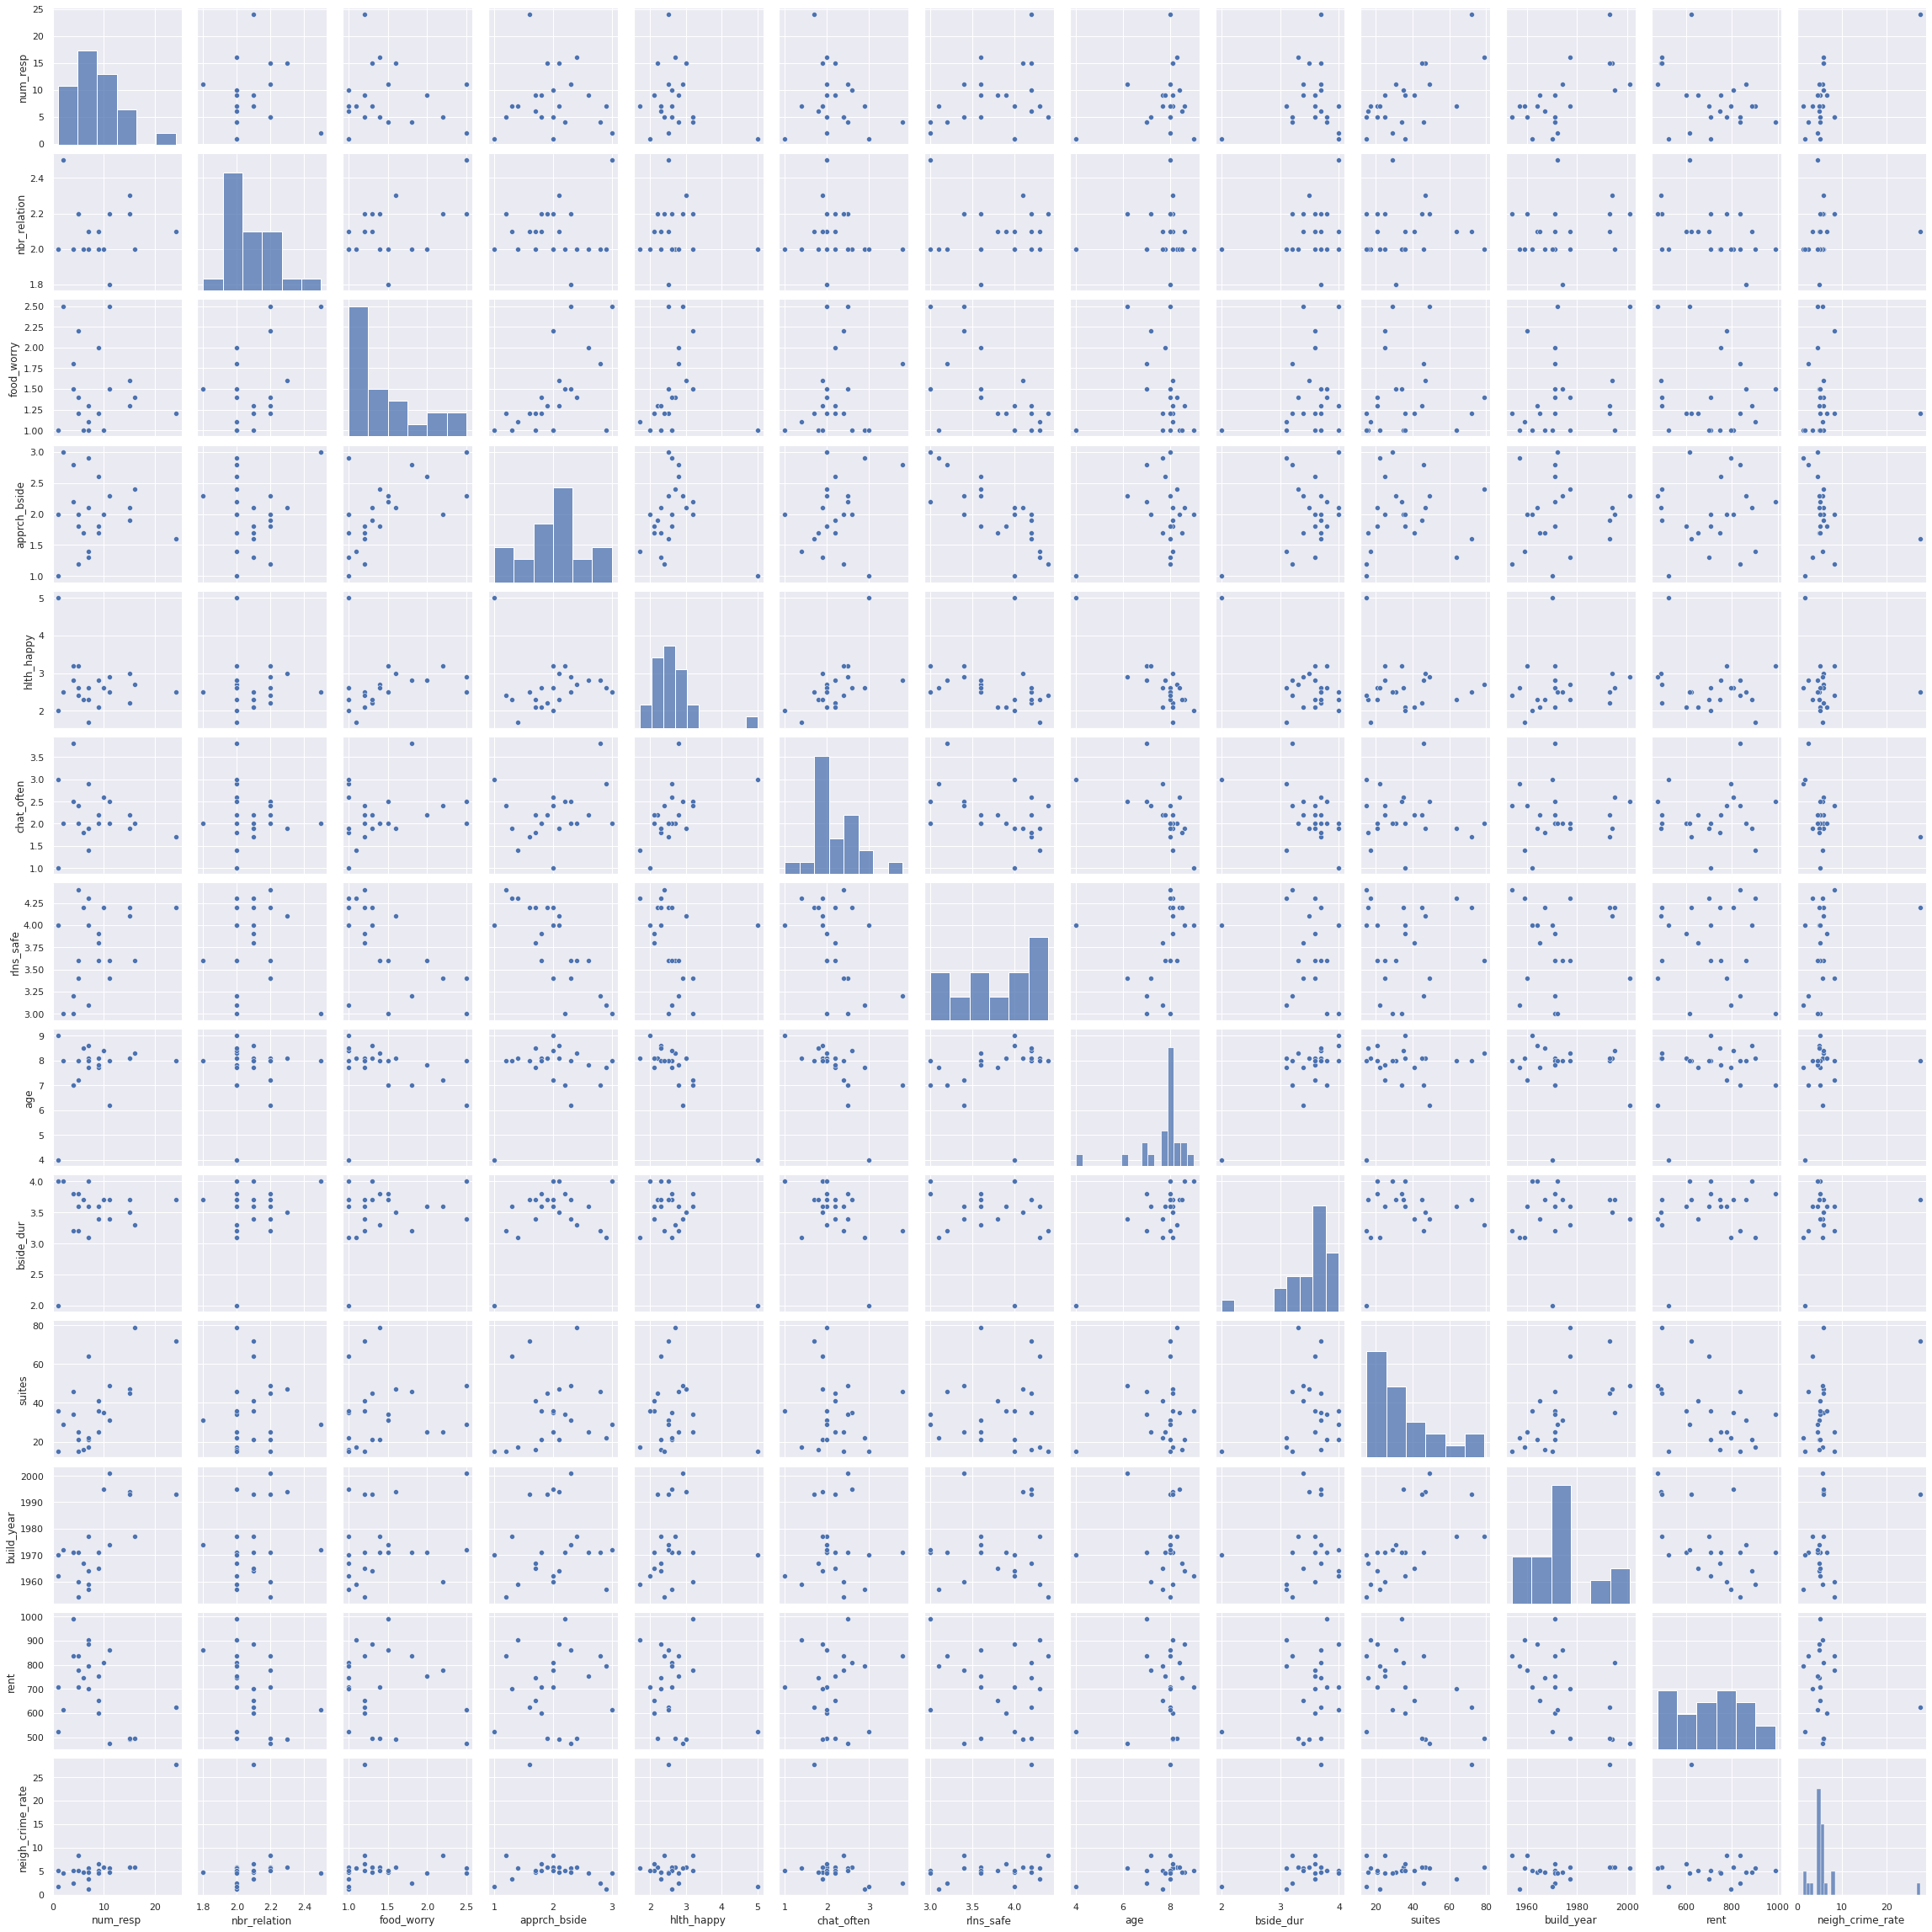

In [273]:
# continuous = num_resp, suites, build_year, rent, neigh_crime_rate
# continuous, binned -> consider as ordinal = age, bside_dur
# discrete ordinal = nbr_relation, food_worry, apprch_bside, hlth_happy, chat_often, rlns_safe, 
# discrete binary = household, walk_aid, imm_status, bside_pre_muni
# categorical made into index = location
# categorical var = postal, neighbourhood

sns.pairplot(group_data.drop(['household', 'walk_aid', 'imm_status', 'bside_pre_muni', 'postal','neighbourhood'],axis=1));

#### *Findings*:

When considering grouped means, there is a possible linear relation between:
- food_worry and apprch_bside
- apprch_bside and rlns_safe (inverse)
- chat_often and hlth_happy
- chat_often and rlns_safe (inverse)

Approach on more granular (individual) data.

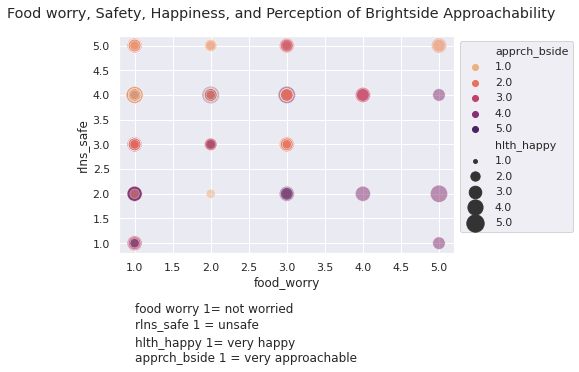

In [285]:
sns.scatterplot(x = indiv.food_worry, y = indiv.rlns_safe, hue = indiv.apprch_bside,
    size = indiv.hlth_happy, sizes = (15,300), alpha = 0.5,legend = 'auto', palette='flare')
plt.legend(bbox_to_anchor= (1,1))
plt.suptitle('Food worry, Safety, Happiness, and Perception of Brightside Approachability')
plt.text(1,-0.4,'food worry 1= not worried')
plt.text(1, -0.7, 'rlns_safe 1 = unsafe')
plt.text(1,-1.1, 'hlth_happy 1= very happy')
plt.text(1, -1.4, 'apprch_bside 1 = very approachable');

#### *Findings*:

In general, tenants who 

- are not worried about food, 

- who feel safe,

- who feel happy

perceive Brightside as approachable.

While not causative, improving on these three items might be where Brightside could most influence the lives of tenants.

### **Could approachability be modelled?**

**Linear Regression**

#### **1.  apprch_bside and food_worry**

In [287]:
import sklearn
from sklearn import linear_model

coeff = [0.51177472]
intercept = 0.40466023549439645


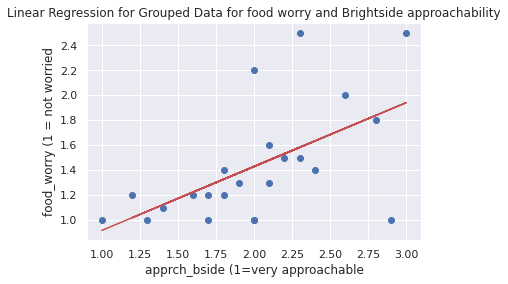

In [289]:
# grouped data
plt.scatter(group_data.apprch_bside, group_data.food_worry)
plt.xlabel('apprch_bside (1=very approachable')
plt.ylabel('food_worry (1 = not worried')

x= group_data.apprch_bside.values.reshape(-1,1)
y= group_data.food_worry

model = sklearn.linear_model.LinearRegression()
model.fit(x,y)
print('coeff =' ,model.coef_)
print('intercept =', model.intercept_)

model.predict(x)
plt.plot(x, model.predict(x), 'r-')
plt.title('Linear Regression for Grouped Data for food worry and Brightside approachability');

coeff = [0.19555816]
intercept = 1.0850969548725584


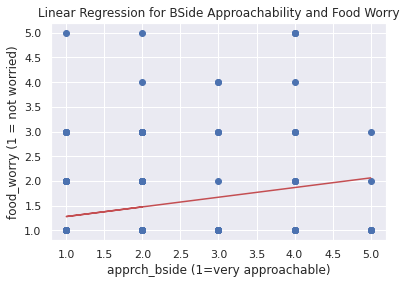

In [290]:
# individual data
plt.scatter(indiv.apprch_bside, indiv.food_worry)
plt.xlabel('apprch_bside (1=very approachable)')
plt.ylabel('food_worry (1 = not worried)')

x= indiv.apprch_bside.values.reshape(-1,1)
y= indiv.food_worry

model = sklearn.linear_model.LinearRegression()
model.fit(x,y)
print('coeff =' ,model.coef_)
print('intercept =', model.intercept_)

model.predict(x)
plt.plot(x, model.predict(x), 'r-')
plt.title('Linear Regression for BSide Approachability and Food Worry');

#### *Findings*:

The perception of approachability of Brightside is linearly related to food stability perception.  Increasing anxiety about food is associated with worsening perception of approachability. 

This is consistent whether data was assesed as a group or as individual data.  Grouped data is suggestive for a polynomial distribution, but is not evident in the individual data.

#### **2.  apprch_bside and rlns_safe**

coeff = [-0.27703924]
intercept = 4.463150058491971


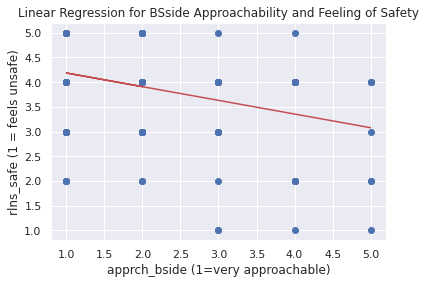

In [291]:
# individual data
plt.scatter(indiv.apprch_bside, indiv.rlns_safe)
plt.xlabel('apprch_bside (1=very approachable)')
plt.ylabel('rlns_safe (1 = feels unsafe)')

x= indiv.apprch_bside.values.reshape(-1,1)
y= indiv.rlns_safe

model = sklearn.linear_model.LinearRegression()
model.fit(x,y)
print('coeff =' ,model.coef_)
print('intercept =', model.intercept_)

model.predict(x)
plt.plot(x, model.predict(x), 'r-')
plt.title('Linear Regression for BSside Approachability and Feeling of Safety');

#### *Findings*:

There is an inverse linear relationship between the perception of approachability and feeling of safety.

Warning:  Confusing interpretation due to opposite polarity.

#### **3.  apprch_bside and hlth_happy**

coeff = [0.31438548]
intercept = 1.910755432663335


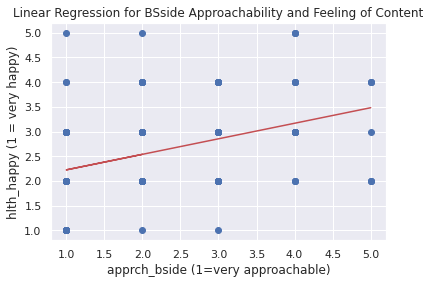

In [292]:
# individual data
plt.scatter(indiv.apprch_bside, indiv.hlth_happy)
plt.xlabel('apprch_bside (1=very approachable)')
plt.ylabel('hlth_happy (1 = very happy)')

x= indiv.apprch_bside.values.reshape(-1,1)
y= indiv.hlth_happy

model = sklearn.linear_model.LinearRegression()
model.fit(x,y)
print('coeff =' ,model.coef_)
print('intercept =', model.intercept_)

model.predict(x)
plt.plot(x, model.predict(x), 'r-')
plt.title('Linear Regression for BSside Approachability and Feeling of Content');

#### *Findings*:

Perception of approachability directly worsens as level of happiness decreases.

#### **4.  apprch_bside and rent**

coeff = [18.00050767]
intercept = 671.7031025339629


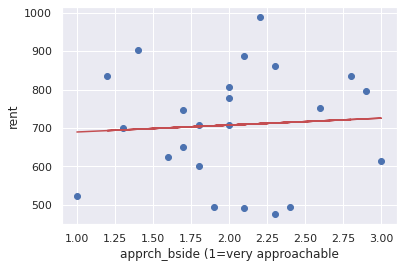

In [293]:
# grouped data
plt.scatter(group_data.apprch_bside, group_data.rent)
plt.xlabel('apprch_bside (1=very approachable')
plt.ylabel('rent')

x= group_data.apprch_bside.values.reshape(-1,1)
y= group_data.rent

model = sklearn.linear_model.LinearRegression()
model.fit(x,y)
print('coeff =' ,model.coef_)
print('intercept =', model.intercept_)

model.predict(x)
plt.plot(x, model.predict(x), 'r-');

#### *Findings*:

There is very minimal relationship between approachability and rent.  

To a very small effect, increasing rental rates worsens the perception of approachability.

#### **Summary of Findings for Linear Regression for apprch_bside:**

There is a linear relationship between perception of approachability:

- improves with less worrying about food,

- improves with feeling of security, 

- improves with feeling of contentment, and

- is minimally affected by rental rates.

### **Ordinal Regression**

Attempts to use ordinal modelling did not show accuracies better than random guessing.

PCA inappropriate due to non-continuous nature of data.

### **4.c. Moving Forward:**

Things that could be addressed:

Identify properties with significant issues in 

1.  food_worry

2.  rlns_safe

3.  hlth_happy


#### **Address food_worry**

In [294]:
# grouped data
# food_worry 1 = not worried
group_data [group_data.food_worry >=3.0]
# no properties with significant food worry

,num_resp,nbr_relation,food_worry,apprch_bside,hlth_happy,chat_often,rlns_safe,age,bside_dur,household,walk_aid,imm_status,bside_pre_muni,suites,postal,build_year,rent,neighbourhood,neigh_crime_rate
location,,,,,,,,,,,,,,,,,,,


In [297]:
# individual data
len(indiv [indiv.food_worry >=3.0])

34

In [299]:
group_data.food_worry.sort_values(ascending=False).head(5)

location
KINGS DAUGHTERS      2.5
GLYNN MANOR          2.5
HARWOOD MANOR        2.2
SOROPTIMIST LIONS    2.0
MACLEOD MANOR        1.8
Name: food_worry, dtype: float64

#### *Findings*:

Food worry is not a particular attribute of a property (grouped data shows no significant worry).  It is apparent when individual data is considered.

Most individuals who find food a challenge are in properties Glynn Manor, Kings Daughters and Harwood Manor.  Glynn Manor has the lowest rental rate, and is it likely that its tenants would be the most financially challenged, also reflecting in worry about securing food.  

Kings Daughters and Harwood Manor are on the low-medium range of rental rates.  It might be worthwhile to offer particular tenants to transfer to a cheaper rental place, so that more money can be allocated to food.

#### **Address safety**

In [301]:
# rlns_safe 1 = feels unsafe
group_data['representation'] = rep.representation

group_data[group_data.rlns_safe <=3][['num_resp','representation','neigh_crime_rate']]

,num_resp,representation,neigh_crime_rate
location,,,
MUIR MANOR,4,0.5,5.1
KINGS DAUGHTERS,2,0.3,4.5


In [303]:
group_data.neigh_crime_rate.sort_values(ascending=False)

location
BRIDGEVIEW PLACE        27.6
HARWOOD MANOR            8.3
FLORENCE MANOR           8.3
MOUNT PLEASANT           6.6
COLLINGWOOD TOWER        5.8
LIONS VIEW BLDG II       5.8
LIONS VIEW BLDG I        5.8
LIONS VIEW BLDG III      5.8
GLYNN MANOR              5.7
MAGNOLO MANOR            5.7
WALLACE WILSON           5.1
LOYAL ORANGE             5.1
MUIR MANOR               5.1
EDWARD BYERS             5.1
BURRARD MANOR            4.8
ARBUTUS COURT            4.8
MORELAND KENNEDY         4.8
SOROPTIMIST LIONS        4.5
KINGS DAUGHTERS          4.5
ALICE SAUNDERS           3.4
MACLEOD MANOR            2.5
WILSON HEIGHTS MANOR     1.7
LONDONDERRY              1.2
Name: neigh_crime_rate, dtype: float64

#### *Findings*:

Tenants from Muir Manor and Kings Daughters have expressed the most significant levels of feeling of non-safety.

The neighbourhood crime rates for these properties are not particularly high. 

Consider other reasons for feeling of non-safety such as building hazards.

*Reminder*:  Kings Daughters has a low level of survey participation.  It is possible that these values are not representative of the whole property.

*Note*:  Survey had variables that pertain to safety, but which did not get enough response.

#### **Address happiness**

In [304]:
# hlth_happy 1 = very happy
group_data[group_data.hlth_happy >3][['representation', 'hlth_happy']]

,representation,hlth_happy
location,,
MUIR MANOR,0.5,3.2
HARWOOD MANOR,0.9,3.2
WILSON HEIGHTS MANOR,0.3,5.0


#### *Findings*:

Three properties have tenants who have expressed the feeling of non-happiness.  Previous preparation has removed the differentiation between physical vs mental happiness because the two variables had very similar results.

Brightside could focus on evaluating the source of non-happiness for tenants in Harwood Manor.

Wilson Heights Manor has a tenant that has expressed extreme non-happiness.  It might be a good idea to check on this particular tenant for depression or extreme dissatisfaction.

### **Summary and Recommendations**

1.  What is the tenant profile for 2020?

- Most of the tenants are female seniors, living by themselves, with no requirement for walking aids.

-  Families and disabled people ***could*** be underrepresented.

-  Tenancy for immigration status is equitable.

    --> Review importance of equitability for Brightside mandate.

2.  Is the community healthy?

    Most tenants' basic needs (food, happiness), safety needs and social interaction needs are met.

3.  Are the tenants happy with Brightside?

    Most tenants perceive Brightside as approachable, and tend to stay with them for years.

    --> no major need for uplift in current systems


4.  What are possible rooms for improvement?

    Using approachability as gauge of success:

    The perception of approachability improves with decreasing food worry, and increasing feeling of safety and happiness.  It is minimally affected by rental rates.

    Possible concrete steps:

-  Addressing the general financial problems of individuals, especially in Glynn Manor.

-  Review tenancy in Kings Daughters and Harwood Manor, for possible transfer to a cheaper rental place, to allow for increased percentage of funds that can go to securing food.

- Review building safety in Muir Manor and Kings Daughters.

-  Inquire into cause for non-happiness in Harwood Manor.

-  Check on an individual in Wilson Heights Manor that could be manifesting with depression. 

#### **Recommendations for Subsequent Surveys:**

1.  include only most relevant variables, don't make survey too long to avoid reviewer and respondent fatigue that could lead to poor data.

2.  consider making the polarity of the ordinal values consistent (e.g. 1 = most negative, 5 = most positive)

3.  make null entries consistent (e.g. NaN versus blank or 'prefer not to answer' value)

4.  balance the representation of tenants per building

5.  include neighbourhood location consistent with Canada census or VPD, and/or include longitutude/latitude values to enable correlation with other external datasets.

In [ ]:
# https://brightsidehomes.ca/
# committed to providing safe and secure homes 
#   for those struggling to meet the demands of market housing, 
#   and are working towards a future 
#   where people of all income levels 
#   live within a vibrant and healthy community.
# Brightside fosters a community environment where everyone feels safe,
#   secure and has a sense of belonging. 
#   Our residents are seniors, families and people with disabilities
#   who are able to live independently.

# https://brightsidehomes.ca/who-we-are/our-approach/
# Brightside places important focus on community development 
#   that fosters strong social connections and resilience among its residents.

# mission
# Build resilient communities, throughout Metro Vancouver, 
#   with safe and secure homes 
#   for those struggling to meet the demands of market housing.

# vision
#   A future where people of all income levels have a home 
#   within a vibrant and healthy community.

# values
#   To maintain Clarity, we must be fair, open, and consistent.
#   To be Inclusive, we must be respectful, approachable, and empathetic.
#   To be Progressive, we must be adaptive, flexible, and pro-active.
#   To support Social Justice, we must be intentional in highlighting issues, 
#      take action to create equitable opportunity, and actively advocate for our vision.
#   To be Resourceful, we must be rigorous, diligent, and be great problem solvers.

In [ ]:
# Questions: (generated retrospectively)
# 1.  Do the tenants feel safe?
# 2.  Is the tenant profile (seniors, families and people with dis) upheld?
# 3.  Is there a strong social connection?
# 4.  Is the community resilient?
# 5.  The properties are located throughout Vancouer
# 6.  Do the tenants perceive Bside as approachable?
# 7.  Is the tenant profile equally distributed? (Weak rep for equitability)